In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving Housing.csv to Housing.csv


In [3]:
df=pd.read_csv('Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


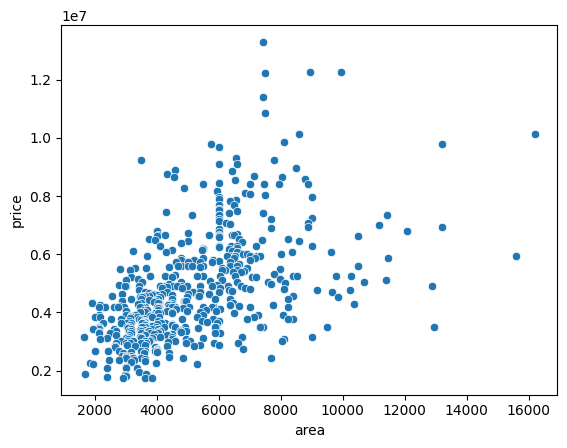

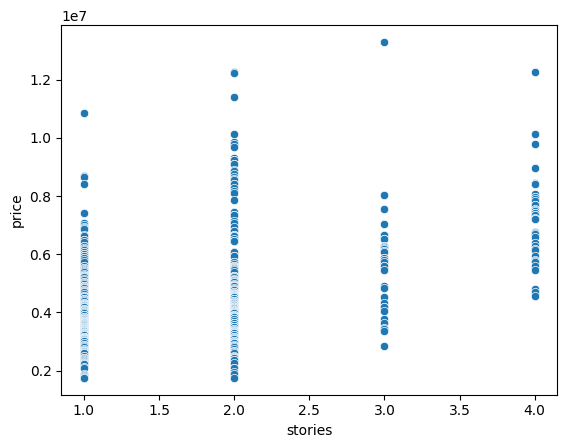

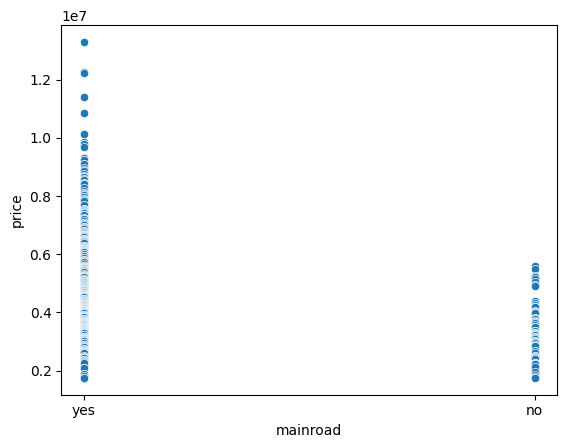

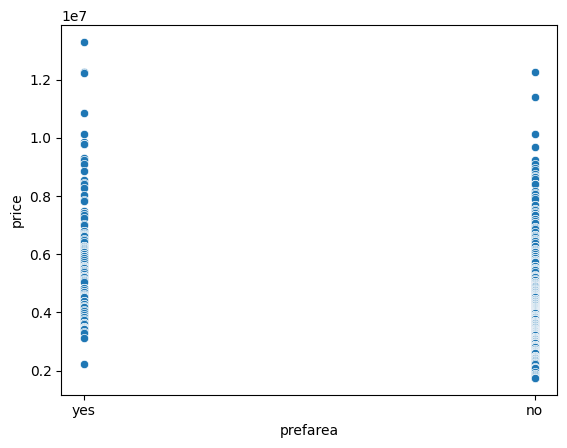

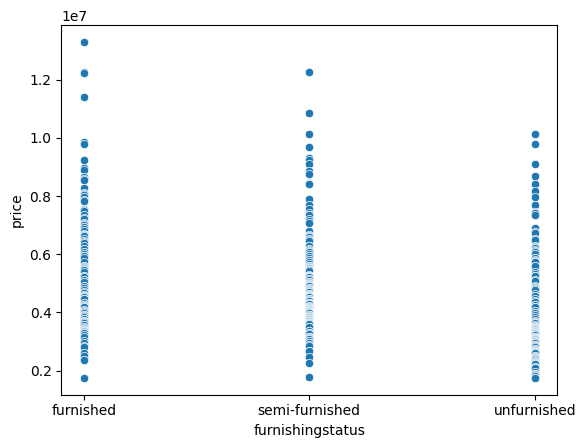

In [5]:
for x_var in ['area', 'stories', 'mainroad', 'prefarea', 'furnishingstatus']:
    sns.scatterplot(data=df, x=x_var, y='price')

    plt.show()

#numeric_df = df.select_dtypes(include='number')


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#categorical_columns = ['mainroad', 'prefarea', 'furnishingstatus']
#df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#X=df_encoded[['area','stories', 'mainroad_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished']]
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':1,'semi-furnished':0,'unfurnished':-1})
X=df[['area','stories', 'bedrooms','mainroad', 'prefarea', 'furnishingstatus','parking','airconditioning','guestroom','basement']]
y=df['price']
X = X.fillna(0)
y = y.fillna(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [3.85762625e+02 7.76207174e+05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.00368751e+05 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Intercept: 1090202.0430159066


In [61]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

print(X_train_sm.shape , y_train.shape)
#X_train_sm = pd.get_dummies(X_train_sm, drop_first=True)
print(X_train_sm.dtypes)

lr = sm.OLS(y_train, X_train_sm).fit()
y_pred=np.dot(X_test,reg.coef_)+reg.intercept_
#print(sqrt(sum(((y_test-y_pred)**2)/X_test.shape[0])))
#lr.params
print(df[['area','stories', 'bedrooms','mainroad', 'prefarea', 'furnishingstatus','airconditioning','parking','guestroom','basement']].corr())
print(lr.summary())
#print("R2:",R2(y_test,reg))

(381, 10) (381,)
const               float64
area                  int64
stories               int64
mainroad            float64
prefarea            float64
furnishingstatus    float64
parking               int64
airconditioning     float64
guestroom           float64
basement            float64
dtype: object


NameError: name 'sqrt' is not defined